# Exploring Cambodia DHS Survey Dataset

In [ ]:
#####################################################################
############################## IMPORTS ##############################
#####################################################################

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

In [ ]:
#####################################################################
############################# CONSTANTS #############################
#####################################################################

NUM_MISSING_THRESHOLD = 1600 # YOU CHOSE THIS WHY --- BECAUSE YOU NOTICED THE DISTRIBUTION OF NULL VALUES
FILENAME = 'KHHR73DT/KHHR73FL.dta'
DO_FILENAME = 'KHHR73DT/KHHR73FL2.DO'

In [ ]:
data = pd.io.stata.read_stata(FILENAME) # COMMAND TO READ A STATA FILE
data

,hhid,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,...,sh80n_01,sh80n_02,sh80n_03,sh80n_04,sh80n_05,sh80n_06,sh80n_07,sh80n_08,sh80n_09,sh80n_10
0,1 1,KH6,1,1,1,1,1303385,7,2014,1375,...,50000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 2,KH6,1,2,1,1,1303385,7,2014,1375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 3,KH6,1,3,2,1,1303385,7,2014,1375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 4,KH6,1,4,1,1,1303385,7,2014,1375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 5,KH6,1,5,1,1,1303385,7,2014,1375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,61124,KH6,611,24,1,611,600033,6,2014,1374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15821,61125,KH6,611,25,1,611,600033,6,2014,1374,...,25000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15822,61126,KH6,611,26,2,611,600033,6,2014,1374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15823,61127,KH6,611,27,1,611,600033,6,2014,1374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What do we notice..? We notice that a LOT of the values are NaN (or null/empty). This means that several of these questions were unanswered or undocumented for a significant portion of the people in the survey. As such, we cannot effectively use these features for our machine learning model.

In [ ]:
# # ACCESS A SPECIFIC COLUMN FROM YOUR DATASET
# data['hv108_01'] # NAME OF DATA = data, NAME OF COLUMN = STRING INSIDE OF SQUARE BRACKETS

In [ ]:
# GETS THE TOTAL NUMBER OF NaNs in EACH COLUMN
data.isna().sum() 

hhid            0
hv000           0
hv001           0
hv002           0
hv003           0
            ...  
sh80n_06    15824
sh80n_07    15825
sh80n_08    15825
sh80n_09    15825
sh80n_10    15825
Length: 1873, dtype: int64

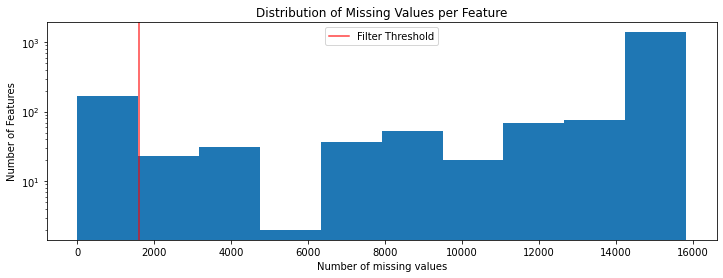

In [ ]:
# PLOT THE DISTFIBTUION OF NaN VALUES PER COLUMN (FEATURE)
plt.figure(figsize=(12, 4))
plt.hist(data.isna().sum(), log=True);
plt.xlabel('Number of missing values')
plt.ylabel('Number of Features')
plt.title('Distribution of Missing Values per Feature');
plt.axvline(x = 1600, color ='red', alpha=0.75, label='Filter Threshold')
plt.legend()

## Removing Null Values (Attempt 1)

In [ ]:
# REMOVE COLUMNS THAT HAVE A LOT OF NaNs
modified_data = data.dropna(axis='columns')

In [ ]:
modified_data

,hhid,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,...,ha62_01,ha62_02,ha62_03,ha62_04,ha62_05,ha62_06,ha62_07,ha62_08,ha62_09,ha62_10
0,1 1,KH6,1,1,1,1,1303385,7,2014,1375,...,,,,,,,,,,
1,1 2,KH6,1,2,1,1,1303385,7,2014,1375,...,,,,,,,,,,
2,1 3,KH6,1,3,2,1,1303385,7,2014,1375,...,,,,,,,,,,
3,1 4,KH6,1,4,1,1,1303385,7,2014,1375,...,,,,,,,,,,
4,1 5,KH6,1,5,1,1,1303385,7,2014,1375,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,61124,KH6,611,24,1,611,600033,6,2014,1374,...,,,,,,,,,,
15821,61125,KH6,611,25,1,611,600033,6,2014,1374,...,,,,,,,,,,
15822,61126,KH6,611,26,2,611,600033,6,2014,1374,...,,,,,,,,,,
15823,61127,KH6,611,27,1,611,600033,6,2014,1374,...,,,,,,,,,,


After we dropped all the columns with NaN... we noticed that several columns had nothing in them. This is also problematic, because these empty features are not useful for our machine learning analysis. So, my next initiative was to remove all these columns that had empty values.

In [ ]:
# THIS REPLACES ALL THE EMPTY VALUES WITH NaNs
modified_data = modified_data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# WE DROP THE COLUMNS WITH NaNs again.... THIS TIME IT DROPS THOSE PREVIOUSLY EMPTY COLUMNS
# THIS IS EQUIVALENT TO DROPPING THE COLUMNS WITH THE EMPTY VALUES
modified_data = modified_data.dropna(axis='columns')

In [ ]:
modified_data

,hhid,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,...,hv103_01,hv104_01,hv105_01,hv117_01,hv118_01,hv120_01,hv121_01,hv122_01,hv124_01,idxh4_01
0,1 1,KH6,1,1,1,1,1303385,7,2014,1375,...,yes,female,34,eligible,not eligible,not eligible,no,"no education, preschool",0,1
1,1 2,KH6,1,2,1,1,1303385,7,2014,1375,...,yes,male,39,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
2,1 3,KH6,1,3,2,1,1303385,7,2014,1375,...,no,male,41,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
3,1 4,KH6,1,4,1,1,1303385,7,2014,1375,...,yes,female,17,eligible,not eligible,not eligible,no,"no education, preschool",0,1
4,1 5,KH6,1,5,1,1,1303385,7,2014,1375,...,yes,male,56,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,61124,KH6,611,24,1,611,600033,6,2014,1374,...,yes,male,23,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15821,61125,KH6,611,25,1,611,600033,6,2014,1374,...,yes,male,61,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15822,61126,KH6,611,26,2,611,600033,6,2014,1374,...,yes,male,30,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15823,61127,KH6,611,27,1,611,600033,6,2014,1374,...,yes,female,58,not eligible,not eligible,not eligible,no,"no education, preschool",0,1


We then noticed that the notation and description of our data was scattered across multiple files. So we opted to consolidate these files into one, simple dataframe. We will do this by manipulating or .DO file.

In [ ]:
# THE WAY TO OPEN AND READ A FILE IN PYTHON
with open(DO_FILENAME, 'r') as f:
    do_file_lines = f.readlines()

In [ ]:
# LIST COMPREHENSION TO GET THE LINES THAT HOLD THE VARIABLE NAMES
variable_lines = [x for x in do_file_lines if x.startswith('label variable')]
variable_names_dict = {x.split()[2]: x.split('\"')[1] for x in variable_lines if x.split()[2] in modified_data.columns}

In [ ]:
modified_data.rename(columns=variable_names_dict)

,Case Identification,Country code and phase,Cluster number,Household number,Respondent's line number (answering Household questionnaire),Ultimate area unit,Household sample weight (6 decimals),Month of interview,Year of interview,Date of interview (CMC),...,Slept last night,Sex of household member,Age of household members,Eligibility for female interview,Eligibility for male interview,Children eligibility for height/weight and hemoglobin,Member attended school during current school year,Educational level during current school year,Education in single years - current school year,Index to Household Schedule
0,1 1,KH6,1,1,1,1,1303385,7,2014,1375,...,yes,female,34,eligible,not eligible,not eligible,no,"no education, preschool",0,1
1,1 2,KH6,1,2,1,1,1303385,7,2014,1375,...,yes,male,39,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
2,1 3,KH6,1,3,2,1,1303385,7,2014,1375,...,no,male,41,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
3,1 4,KH6,1,4,1,1,1303385,7,2014,1375,...,yes,female,17,eligible,not eligible,not eligible,no,"no education, preschool",0,1
4,1 5,KH6,1,5,1,1,1303385,7,2014,1375,...,yes,male,56,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,61124,KH6,611,24,1,611,600033,6,2014,1374,...,yes,male,23,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15821,61125,KH6,611,25,1,611,600033,6,2014,1374,...,yes,male,61,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15822,61126,KH6,611,26,2,611,600033,6,2014,1374,...,yes,male,30,not eligible,not eligible,not eligible,no,"no education, preschool",0,1
15823,61127,KH6,611,27,1,611,600033,6,2014,1374,...,yes,female,58,not eligible,not eligible,not eligible,no,"no education, preschool",0,1


We noticed that a lot of these features that are not null are also not very useful for poverty prediction. We want to find and add in some more features that will be useful.

## Removing Null Values (Attempt 2)

In this new attempt, we will try to retain more columns/features because a lot of the columns we had previously were not useful pieces of information for poverty prediction.

In [ ]:
# THIS REPLACES ALL THE EMPTY VALUES WITH NaNs
modified_data2 = data.replace(r'^\s*$', np.nan, regex=True)

# GETS THE TOTAL NUMBER OF NaNs in EACH COLUMN
num_missing_per_column = modified_data2.isna().sum()

In [ ]:
# GETS TRUE/FALSE VALUES TO KNOW WHICH COLUMNS/FEATURES ARE LESS THAN THE THRESHOLD
filtered_values = [num_missing_per_column < NUM_MISSING_THRESHOLD]

In [1]:
# GET THE CORRESPONDING COLUMNS FOR THE FILTERED VALUES
filtered_columns = modified_data2.columns[filtered_values]

In [ ]:
modified_data2 = data[filtered_columns]

In [ ]:
modified_data2.shape

(15825, 161)

In [ ]:
# LIST COMPREHENSION TO GET THE LINES THAT HOLD THE VARIABLE NAMES
variable_lines = [x for x in do_file_lines if x.startswith('label variable')]
variable_names_dict = {x.split()[2]: x.split('\"')[1] for x in variable_lines if x.split()[2] in modified_data2.columns}

In [ ]:
modified_data2 = modified_data2.rename(columns=variable_names_dict)

Since we kept columns even though they had null values... we will now have many rows with null values. Let us try to see how many missing values there are per row (per sample/household)

In [ ]:
# WE DROP THE ROWS WITH NaNs ... WE DO NOT WANT ANY PEOPLE THAT HAVE MISSING VALUES
modified_data2 = modified_data2.dropna(axis='rows')

In [ ]:
modified_data2

,Case Identification,Country code and phase,Cluster number,Household number,Respondent's line number (answering Household questionnaire),Ultimate area unit,Household sample weight (6 decimals),Month of interview,Year of interview,Date of interview (CMC),...,Problem of Hearing,Problem of Hearing,Problem of Walking and Climbing,Problem of Walking and Climbing,Problem of Remembering or Concentrating,Problem of Remembering or Concentrating,Problem with Self-Care,Problem with Self-Care,Problem of Communicating :CS,Problem of Communicating :CS
1,1 2,KH6,1,2,1,1,1303385,7,2014,1375,...,no,no,no,no,no,no,no,no,no,no
2,1 3,KH6,1,3,2,1,1303385,7,2014,1375,...,no,no,no,no,no,no,no,no,no,no
4,1 5,KH6,1,5,1,1,1303385,7,2014,1375,...,no,no,no,no,no,no,no,no,no,no
5,1 6,KH6,1,6,1,1,1303385,7,2014,1375,...,no,no,no,no,no,no,no,no,no,no
6,1 7,KH6,1,7,1,1,1303385,7,2014,1375,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,61124,KH6,611,24,1,611,600033,6,2014,1374,...,no,no,no,no,no,no,no,no,no,no
15821,61125,KH6,611,25,1,611,600033,6,2014,1374,...,no,no,no,no,no,no,no,no,no,no
15822,61126,KH6,611,26,2,611,600033,6,2014,1374,...,no,no,no,no,no,no,no,no,no,no
15823,61127,KH6,611,27,1,611,600033,6,2014,1374,...,no,no,no,no,no,no,no,no,no,no


#### Description in the dataset:
- Too many columns... so I removed columns that had more than some threshold of null values
- Now I was left with many samples/rows that had missing values... so I removed rows with any null values
- This leaves us with a dataset that has no null/missing values at all.

In [ ]:
# NOW WE WILL FIND WHICH COLUMNS/FEATURES WE WILL USE FOR THE ML
list(modified_data2.columns)

['Case Identification',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number (answering Household questionnaire)",
 'Ultimate area unit',
 'Household sample weight (6 decimals)',
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)',
 'Number of household members',
 'Number of eligible women in household',
 'Number of eligible men in household',
 'Number of de jure members',
 'Number of de facto members',
 'Number of children 5 and under (de jure)',
 'Result of household interview',
 'Day of interview',
 'Number of visits',
 'Interviewer identification',
 'Keyer identification',
 'Ever-married sample',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'Region',
 'Type of place of residence',
 'Household selected for male interview',
 'Household weight for male subsample (6 decimals)',
 'Field supervisor',
 'Field editor',
 'Office editor',
 'Number of eligible children for

Manually went through and decided which features to keep based on relative importance for the task of poverty prediction

In [ ]:
desired_columns = [
    'Type of place of residence',
    'Type of toilet facility',
    'Has electricity',
    'Has radio',
    'Has television',
    'Has refrigerator',
    'Has bicycle',
    'Has motorcycle/scooter',
    'Main floor material',
    'Main wall material',
    'Main roof material',
    'Type of cooking fuel',
    'Has mobile telephone',
    'Has watch',
    'Owns land usable for agriculture',
    'Has bank account',
    'Education completed in single years', 
    'Wealth index',
    'Wealth index factor score (5 decimals)',
    'Place where household members wash their hands',
    'Food cooked in the house/ separate building/ outdoors',
    'Has bank account',
    'Province',
    'Person in household accidentally killed or injured in last 12 months (RECH3)',
    'Person in household sick or injured in last 30 days (See RECH3)',
    'Source of drinking water during the dry season',
    'Source of drinking water during wet season',
    'Has wardrobe',
    'Has sewing machine or loom',
    'Has generator/battery/solar panel',
    'Has motorcycle-cart',
    'Has boat without motor',
    'Hectares for agricultural land (number square meters version)',
    'Members of this household receive free or subsidized health care',
    'Usual resident',
    'Slept last night',
    'Sex of household member',
    'Education completed in single years',
    'Member attended school during current school year',
    'Education in single years - current school year',
    'Index to Household Schedule',
]

In [ ]:
import pandas as pd
pd.DataFrame(desired_columns)

,0
0,Type of place of residence
1,Type of toilet facility
2,Has electricity
3,Has radio
4,Has television
5,Has refrigerator
6,Has bicycle
7,Has motorcycle/scooter
8,Main floor material
9,Main wall material


In [ ]:
modified_data2 = modified_data2[desired_columns]

In [ ]:
modified_data2

,Type of place of residence,Type of toilet facility,Has electricity,Has radio,Has television,Has refrigerator,Has bicycle,Has motorcycle/scooter,Main floor material,Main wall material,...,Sex of household member,Sex of household member,Education completed in single years,Education completed in single years,Member attended school during current school year,Member attended school during current school year,Education in single years - current school year,Education in single years - current school year,Index to Household Schedule,Index to Household Schedule
1,rural,no facility/bush/field,yes,no,yes,no,no,yes,wood planks,palm/bamboo/thatch,...,male,female,3.0,0.0,no,no,0,0.0,1,2.0
2,rural,no facility/bush/field,yes,no,yes,no,yes,no,wood planks,metal,...,male,female,8.0,8.0,no,no,0,0.0,1,2.0
4,rural,flush to septic tank,yes,yes,yes,no,yes,yes,wood planks,wood planks/shingles,...,male,female,5.0,2.0,no,no,0,0.0,1,2.0
5,rural,flush to septic tank,yes,yes,yes,no,no,yes,wood planks,wood planks/shingles,...,male,female,10.0,2.0,no,no,0,0.0,1,2.0
6,rural,flush to septic tank,yes,yes,yes,no,yes,yes,wood planks,wood planks/shingles,...,male,female,0.0,0.0,no,no,0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,rural,no facility/bush/field,no,no,no,no,yes,no,palm/bamboo,palm/bamboo/thatch,...,male,female,1.0,3.0,no,no,0,0.0,1,2.0
15821,rural,flush to septic tank,no,no,no,no,yes,yes,wood planks,wood planks/shingles,...,male,female,0.0,0.0,no,no,0,0.0,1,2.0
15822,rural,no facility/bush/field,no,yes,no,no,yes,yes,wood planks,wood planks/shingles,...,male,female,0.0,0.0,no,no,0,0.0,1,2.0
15823,rural,no facility/bush/field,no,yes,no,no,no,no,wood planks,wood planks/shingles,...,female,female,0.0,3.0,no,no,0,0.0,1,2.0


In [ ]:
# REMOVES DUPLICATE COLUMNS FROM THE DATASET
modified_data2 = modified_data2.loc[:,~modified_data2.columns.duplicated()].copy()

### Create the X matrix and y vector

In [ ]:
# We want to create the y vector which holds information on the wealth categories for each sample
y = np.array(modified_data2['Wealth index'])
y[y == 'poorer'] = 'poor'
y[y == 'poorest'] = 'poor'
y[y == 'richer'] = 'rich'
y[y == 'richest'] = 'rich'
np.unique(y)
# np.random.choice(y[y=='poor'], 2000)

array(['middle', 'poor', 'rich'], dtype=object)

In [ ]:
np.unique(modified_data2['Education completed in single years'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [ ]:
# We want to create the X matrix which holds information on the different samples and the corresponding features
X = modified_data2.drop(columns=['Wealth index', 'Wealth index factor score (5 decimals)'])

In order for the machine learning model to work properly, we need to be able to take in numerical data as input. However, our data is categorical... so what you need to do is encode the categorical values to be numberical. For example, 'yes' and 'no' will become 1 and 0.

In [ ]:
le = preprocessing.LabelEncoder()

# NOW WE WANT TO CONVERT THESE CATEGORICAL VALUES TO NUMERICAL VALUES
numerical_columns = ['Number of household members', 'Education completed in single years']
for column_name in X.columns:
    if column_name not in numerical_columns:
        column_values = X[column_name]
        le.fit(column_values)
        encoded_values = le.transform(column_values)
        X[column_name] = encoded_values

In [ ]:
# X['Education completed in single years'] = [np.int64(x) for x in X['Education completed in single years']]

## Data Visualization

<BarContainer object of 3 artists>

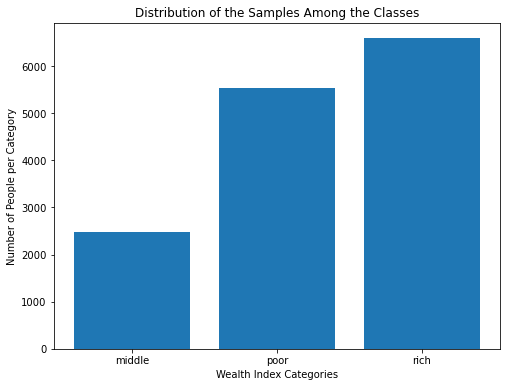

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('Wealth Index Categories')
plt.ylabel('Number of People per Category')
plt.title('Distribution of the Samples Among the Classes')
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')

## Begin the Machine Learning with our final dataset

In [ ]:
print('The size of our input data matrix X is: ', X.shape)
print('The size of our input data vector y is: ', y.shape)
column_names = X.columns

The size of our input data matrix X is:  (14607, 37)
The size of our input data vector y is:  (14607,)


In [ ]:
# CONVERT TO NUMPY ARRAYS
X = np.array(X)
y = np.array(y)

In [ ]:
# WE WANT TO SPLIT OUR DATA INTO TRAINING AND TESTING DATASETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train size: ', X_train.shape)
print('y_train size: ', y_train.shape)
print('X_test size: ', X_test.shape)
print('y_test size: ', y_test.shape)

X_train size:  (11685, 37)
y_train size:  (11685,)
X_test size:  (2922, 37)
y_test size:  (2922,)


In [2]:
### ML Model 1: MULTI-CLASS LOGISTIC REGRESSION

# STEP 1: INITIALIZE YOUR MODEL
logistic_regression_model = LogisticRegression()

# STEP 2: TRAIN YOUR MODEL (FIT IT ON THE TRAINING DATA)
logistic_regression_model.fit(X_train, y_train)

# STEP 3: PREDICT ON THE TEST DATA
y_pred = logistic_regression_model.predict(X_test)

# STEP 4: EVALUATE HOW MANY TIMES THE MODEL IS RIGHT/WRONG
logistic_regression_accuracy = accuracy_score(y_test, y_pred)

# STEP 5: CALCULATE THE F1-SCORE
logistic_regression_f1 = f1_score(y_test, y_pred, average='macro')

# STEP 6: CALCULATE THE PRECISION
logistic_regression_precision = precision_score(y_test, y_pred, average='macro')

# STEP 7: CALCULATE THE RECALL
logistic_regression_recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
print('The Logistic Regression Model has {0:.0%} Accuracy'.format(logistic_regression_accuracy))
print('The Logistic Regression Model has {0:.0%} Precision'.format(logistic_regression_precision))
print('The Logistic Regression Model has a {0:.0%} Recall'.format(logistic_regression_recall))
print('The Logistic Regression Model has a {0:.0%} F1-Score'.format(logistic_regression_f1))

The Logistic Regression Model has 81% Accuracy
The Logistic Regression Model has 73% Precision
The Logistic Regression Model has a 71% Recall
The Logistic Regression Model has a 71% F1-Score


In [3]:
### ML Model 2: RANDOM FOREST CLASSIFICATION MODEL

# STEP 1: INITIALIZE YOUR MODEL
random_forest_model = RandomForestClassifier(max_depth=2, random_state=0)

# STEP 2: TRAIN YOUR MODEL (FIT IT ON THE TRAINING DATA)
random_forest_model.fit(X_train, y_train)

# STEP 3: PREDICT ON THE TEST DATA
y_pred = random_forest_model.predict(X_test)

# STEP 4: EVALUATE HOW MANY TIMES THE MODEL IS RIGHT/WRONG
random_forest_accuracy = accuracy_score(y_test, y_pred)

# STEP 5: CALCULATE THE F1-SCORE
random_forest_f1 = f1_score(y_test, y_pred, average='macro')

# STEP 6: CALCULATE THE PRECISION
random_forest_precision = precision_score(y_test, y_pred, average='macro')

# STEP 7: CALCULATE THE RECALL
random_forest_recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
print('The Random Forest Model has {0:.0%} Accuracy'.format(random_forest_accuracy))
print('The Random Forest Model has {0:.0%} Precision'.format(random_forest_precision))
print('The Random Forest Model has a {0:.0%} Recall'.format(random_forest_recall))
print('The Random Forest Model has a {0:.0%} F1-Score'.format(random_forest_f1))

The Random Forest Model has 80% Accuracy
The Random Forest Model has 53% Precision
The Random Forest Model has a 64% Recall
The Random Forest Model has a 58% F1-Score


In [ ]:
max_amount = 15
cols = list(modified_data2.columns[:])
feat_imports = random_forest_model.feature_importances_[:]

In [ ]:
# cols

In [ ]:
cols[22] = 'Person in household\naccidentally killed past month'
cols[23] = 'Person in household\nsick/injured past month'
cols[24] = 'Source of drinking water\nduring dry season'
cols[16] = 'Education completed\nin single years'

In [ ]:
importance_values = [(y, x) for x, y in zip(cols, feat_imports)]

In [ ]:
importance_values_sorted = sorted(importance_values, reverse=True)[:max_amount]

In [ ]:
importance_values_sorted

[(0.21988143611108912, 'Has electricity'),
 (0.20015954402593247, 'Type of toilet facility'),
 (0.11770394776474373, 'Type of cooking fuel'),
 (0.0800992332530805, 'Person in household\naccidentally killed past month'),
 (0.07191843415078919, 'Type of place of residence'),
 (0.06020810053564281, 'Has television'),
 (0.055018284005429983, 'Source of drinking water\nduring dry season'),
 (0.04914833910445446, 'Person in household\nsick/injured past month'),
 (0.028489694063058225, 'Main floor material'),
 (0.023219649913612254, 'Has wardrobe'),
 (0.019071382862900877, 'Main wall material'),
 (0.018367245550592434, 'Has refrigerator'),
 (0.01497931992187474, 'Education completed\nin single years'),
 (0.011184716036271976, 'Has mobile telephone'),
 (0.00846151237466801, 'Has watch')]

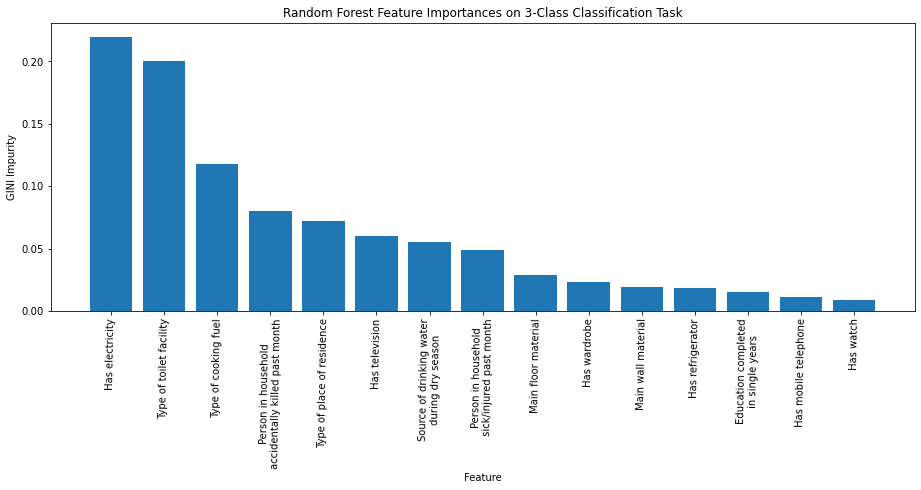

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
labels = [x[1] for x in importance_values_sorted]
importances = [x[0] for x in importance_values_sorted]
ax.bar(labels, importances)
ax.set_xlabel('Feature')
ax.set_ylabel('GINI Impurity')
ax.set_title('Random Forest Feature Importances on 3-Class Classification Task')
plt.xticks(rotation = 89) 
plt.show()

In [ ]:
### ML Model 3: K-NEAREST NEIGHBORS CLASSIFICATION MODEL

# STEP 1: INITIALIZE YOUR MODEL
knn_model = KNeighborsClassifier(n_neighbors=25)

# STEP 2: TRAIN YOUR MODEL (FIT IT ON THE TRAINING DATA)
knn_model.fit(X_train, y_train)

# STEP 3: PREDICT ON THE TEST DATA
y_pred = knn_model.predict(X_test)

# STEP 4: EVALUATE HOW MANY TIMES THE MODEL IS RIGHT/WRONG
knn_accuracy = accuracy_score(y_test, y_pred)

# STEP 5: CALCULATE THE PRECISION
knn_precision = precision_score(y_test, y_pred, average='macro')

# STEP 6: CALCULATE THE RECALL
knn_recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
print('The KNN Model has {0:.0%} Accuracy'.format(knn_accuracy))

The KNN Model has 76% Accuracy


In [ ]:
### ML Model 4: SVM CLASSIFICATION MODEL

# STEP 1: INITIALIZE YOUR MODEL
svm_model = SVC(kernel='linear')

# STEP 2: TRAIN YOUR MODEL (FIT IT ON THE TRAINING DATA)
svm_model.fit(X_train, y_train)

# STEP 3: PREDICT ON THE TEST DATA
y_pred = svm_model.predict(X_test)

# STEP 4: EVALUATE HOW MANY TIMES THE MODEL IS RIGHT/WRONG
svm_accuracy = accuracy_score(y_test, y_pred)

# STEP 5: CALCULATE THE PRECISION
svm_precision = precision_score(y_test, y_pred, average='macro')

# STEP 6: CALCULATE THE RECALL
svm_recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
print('The SVM Model has {0:.0%} Accuracy'.format(svm_accuracy))

The SVM Model has 87% Accuracy


In [ ]:
### ML Model 5: NEURAL NETWORK CLASSIFICATION MODEL

# STEP 1: INITIALIZE YOUR MODEL
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), max_iter=500)

# STEP 2: TRAIN YOUR MODEL (FIT IT ON THE TRAINING DATA)
nn_model.fit(X_train, y_train)

# STEP 3: PREDICT ON THE TEST DATA
y_pred = nn_model.predict(X_test)

# STEP 4: EVALUATE HOW MANY TIMES THE MODEL IS RIGHT/WRONG
nn_accuracy = accuracy_score(y_test, y_pred)

# STEP 5: CALCULATE THE F1-SCORE
nn_f1 = f1_score(y_test, y_pred, average='macro')

# STEP 6: CALCULATE THE PRECISION
nn_precision = precision_score(y_test, y_pred, average='macro')

# STEP 7: CALCULATE THE RECALL
nn_recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
print('The Neural Network Model has {0:.0%} Accuracy'.format(nn_accuracy))
print('The Neural Network Model has {0:.0%} Precision'.format(nn_precision))
print('The Neural Network Model has a {0:.0%} Recall'.format(nn_recall))
print('The Neural Network Model has a {0:.0%} F1-Score'.format(nn_f1))

The Neural Network Model has 87% Accuracy
The Neural Network Model has 83% Precision
The Neural Network Model has a 85% Recall
The Neural Network Model has a 83% F1-Score


In [ ]:
categories = np.unique(y_pred)

In [ ]:
categories

array(['middle', 'poor', 'rich'], dtype='<U6')

## ROC Curve

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, labels, figsize):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
#     print(y_test_dummies)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f}) for label {}'.format(roc_auc[i], labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [ ]:
labels = {i:x for i, x in enumerate(np.unique(y))}

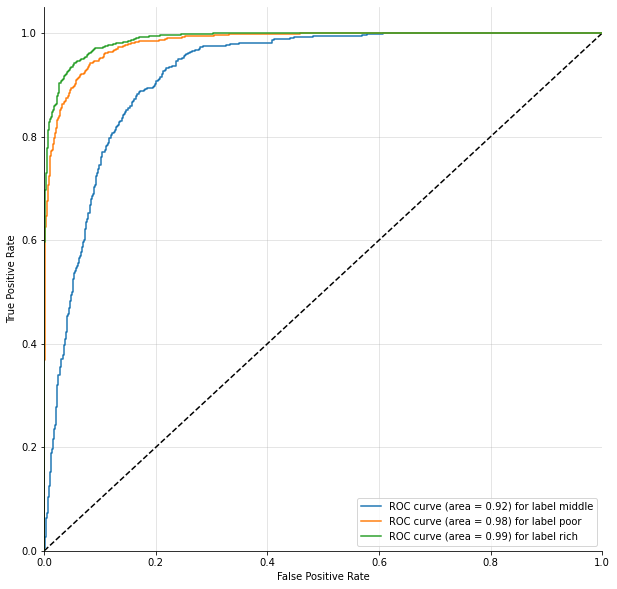

In [ ]:
plot_multiclass_roc(nn_model, X_test, y_test, 3, labels, figsize=(10, 10))

## Confusion Matrix

Text(33.0, 0.5, 'Actual')

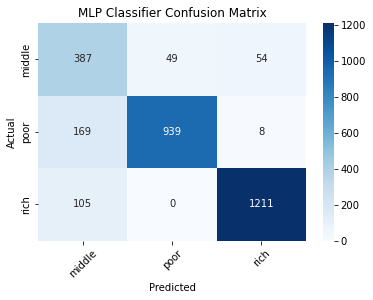

In [ ]:
ax = plt.subplot()
# ax.set_figheight(15)
# ax.set_figwidth(15)
ax.set_title('MLP Classifier Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels'); 
plt.xticks(rotation=45)
cfm = confusion_matrix(y_test, y_pred, labels=categories)
sns.heatmap(cfm, annot=True, fmt=".0f", cmap="Blues", ax=ax)

ax.xaxis.set_ticklabels(categories); 
ax.yaxis.set_ticklabels(categories);
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## Metrics

### Random Guessing Model

In [ ]:
num_people_in_test = X_test.shape[0]
possible_options = np.unique(y)
print(possible_options)

['middle' 'poor' 'rich']


In [ ]:
y_random_pred = []
for _ in range(num_people_in_test):
    rolled_dice_value = np.random.randint(0, 3)
    predicted_value = possible_options[rolled_dice_value]
    y_random_pred.append(predicted_value)

In [ ]:
random_accuracy = accuracy_score(y_test, y_random_pred)
random_f1 = f1_score(y_test, y_random_pred, average='macro')
print('The Random Model has {0:.0%} Accuracy'.format(random_accuracy))
print('The Random Model has a {0:.0%} F1-Score'.format(random_f1))



The Random Model has 32% Accuracy
The Random Model has a 31% F1-Score


### Strategic Guessing Model

In [ ]:
from collections import Counter

counter_dict = dict(Counter(y))
new_counter_dict = { x: counter_dict[x] / len(y) for x in counter_dict.keys() }

In [ ]:
possible_options = list(new_counter_dict.keys())
possible_probs = list(new_counter_dict.values())
print(possible_options)

['poorer', 'richer', 'middle', 'richest', 'poorest']


In [ ]:
y_random_pred = []
for _ in range(num_people_in_test):
    rolled_dice_value = np.random.choice([0, 1, 2, 3, 4], p=possible_probs)
    predicted_value = possible_options[rolled_dice_value]
    y_random_pred.append(predicted_value)

In [ ]:
random_accuracy = accuracy_score(y_test, y_random_pred)
print('The Biased Random Model has {0:.0%} Accuracy'.format(random_accuracy))

The Biased Random Model has 21% Accuracy


#### Mini Dataset Example
- In our miniature dataset, we have only **15** people total. 
- The first thing we do is split this dataset up into a training dataset and a testing dataset.
- The samples in X_train/X_mini_train per row correspond to the classes in y_train/y_mini_train.
- The same is true for X_test/X_mini_test and y_test/y_mini_test
- Train the model just on the training dataset. We don't want to train on the testing dataset since we are simulating what it's like for those to be unknown real data.
- We want to see what classes the model predicts just from the testing dataset features alone.

In [ ]:
# MINI EXAMPLE:
X_mini = np.array(modified_data2[['Has mobile telephone', 'Has electricity', 'Education completed in single years']])[100:115, :]
y_mini = np.array(modified_data2[['Wealth index']])[100:115]

In [ ]:
pd.DataFrame(X_mini, columns=['Has mobile telephone', 'Has electricity', 'Education completed in single years'])

,Has mobile telephone,Has electricity,Education completed in single years
0,yes,yes,9.0
1,yes,yes,5.0
2,yes,yes,12.0
3,yes,yes,9.0
4,yes,yes,11.0
5,yes,yes,3.0
6,yes,yes,5.0
7,yes,yes,7.0
8,yes,yes,4.0
9,yes,yes,5.0


In [ ]:
y_mini

array([['richest'],
       ['richest'],
       ['richer'],
       ['richest'],
       ['richest'],
       ['richer'],
       ['richest'],
       ['poorer'],
       ['poorer'],
       ['middle'],
       ['poorest'],
       ['poorest'],
       ['middle'],
       ['poorest'],
       ['richer']], dtype=object)

In [ ]:
X_mini_train, X_mini_test, y_mini_train, y_mini_test = train_test_split(X_mini, y_mini, test_size=0.33, random_state=42)

In [ ]:
X_mini_train

array([['yes', 'yes', 4.0],
       ['yes', 'yes', 12.0],
       ['yes', 'yes', 5.0],
       ['yes', 'yes', 0.0],
       ['yes', 'yes', 11.0],
       ['yes', 'yes', 7.0],
       ['yes', 'yes', 0.0],
       ['yes', 'yes', 4.0],
       ['yes', 'yes', 9.0],
       ['yes', 'yes', 5.0]], dtype=object)

In [ ]:
y_mini_train

array([['poorer'],
       ['richer'],
       ['richest'],
       ['richer'],
       ['richest'],
       ['poorer'],
       ['poorest'],
       ['middle'],
       ['richest'],
       ['richest']], dtype=object)

In [ ]:
X_mini_test

array([['yes', 'yes', 5.0],
       ['no', 'yes', 6.0],
       ['yes', 'yes', 9.0],
       ['yes', 'no', 0.0],
       ['yes', 'yes', 3.0]], dtype=object)

In [ ]:
y_mini_test

array([['middle'],
       ['poorest'],
       ['richest'],
       ['poorest'],
       ['richer']], dtype=object)

In [ ]:
y_predictions = ['poorest',
                 'poorest',
                 'richest',
                 'poorer',
                 'rich']